 # Text summarization using extractive summarization techniques.

In [1]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
from nltk.tokenize import sent_tokenize
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# The text used is a poetry I wrote a while back.
text = """Child, know it now and let it be clear. The moment you ascend the throne of the gods or wear the crown of kings, you relinquish the ability to express all with freedom. In the time of pain and trouble where you wish to cry and wallow in the pits, the entity you have become will not let you to. You will be forced to stand tall when all you wish is to fall, forced to look ahead when all you want is to look down. The stars, moon and sun you claimed to be will force you to shine when all you want is to be devoid of all that is light. You will be forced to flow when you wish to become stagnant, forced to be firm when your core foundations are shattering, and  forced to burn even more when the light in you has grown dim. This now, is your fate. Days will come when you wish to rid your soul of this entity and be a simple being. This my child, will never happen. The entity you have become will not give you such  frivolous chance, because to get rid is to give up and to give up is not the character of the highly esteemed being you said you are.""" 

In [3]:
# This cleans the text, removing everthing but alphacharacters, full stops and commas.
article = sent_tokenize(text)
sentences = []
    
for sentence in article:
    review = re.sub('[^a-zA-Z\.\,]',' ', sentence)
    sentences.append(review)
print(sentences)

['Child, know it now and let it be clear.', 'The moment you ascend the throne of the gods or wear the crown of kings, you relinquish the ability to express all with freedom.', 'In the time of pain and trouble where you wish to cry and wallow in the pits, the entity you have become will not let you to.', 'You will be forced to stand tall when all you wish is to fall, forced to look ahead when all you want is to look down.', 'The stars, moon and sun you claimed to be will force you to shine when all you want is to be devoid of all that is light.', 'You will be forced to flow when you wish to become stagnant, forced to be firm when your core foundations are shattering, and  forced to burn even more when the light in you has grown dim.', 'This now, is your fate.', 'Days will come when you wish to rid your soul of this entity and be a simple being.', 'This my child, will never happen.', 'The entity you have become will not give you such  frivolous chance, because to get rid is to give up an

In [4]:
# This function convert the sentences into vectors and finds the cosine distance between them. 

def sentence_similarity(sent_1, sent_2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sentence_1 = sent_1.lower().split(' ') # every sentence is broken down into words.
    sentence_2 = sent_2.lower().split(' ') # every sentence is broken down into words.
 
    all_words = list(set(sentence_1  + sentence_2))
 
    vec_1 = [0] * len(all_words) # creates an empty vector of the length size of all_words
    vec_2 = [0] * len(all_words)
 #  integer encoding
    # build the vector for the first sentence
    for w in sentence_1:
        if w in stopwords:
            continue
        vec_1[all_words.index(w)] += 1 # it adds 1 to the index position of the word in sentence_1
 
    # build the vector for the second sentence
    for w in sentence_2:
        if w in stopwords:
            continue
        vec_2[all_words.index(w)] += 1 # it adds 1 to the index position of the word in sentence_2
 
    return 1 - cosine_distance(vec_1, vec_2)
 

In [5]:
stop_words = stopwords.words('english')

In [6]:
# Creating an empty matrix and initializing it to zero.
similarity_matrix = np.zeros((len(sentences), len(sentences)))

In [7]:
print(similarity_matrix) # Displaying the empty similarity matrix

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
# Here the similarity matrix is filled with the cosine distance.
for id_1 in range (len(sentences)):
        for id_2 in range (len(sentences)):
            if id_1 == id_2:
                continue
            similarity_matrix[id_1][id_2]= sentence_similarity(sentences[id_1], sentences[id_2], stop_words)
            

In [9]:
similarity_matrix # the filled similarity matrix

array([[0.        , 0.        , 0.15075567, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.28867513, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.15075567, 0.        , 0.        , 0.07784989, 0.        ,
        0.12573892, 0.        , 0.21320072, 0.        , 0.13159034],
       [0.        , 0.        , 0.07784989, 0.        , 0.0860663 ,
        0.37686733, 0.        , 0.09128709, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0860663 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.12573892, 0.37686733, 0.        ,
        0.        , 0.        , 0.07372098, 0.        , 0.09100315],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.2132007

In [10]:
sentence_similarity_graph = nx.from_numpy_array(similarity_matrix) # creating the graph
scores = nx.pagerank(sentence_similarity_graph) # obtaining the page rank scores


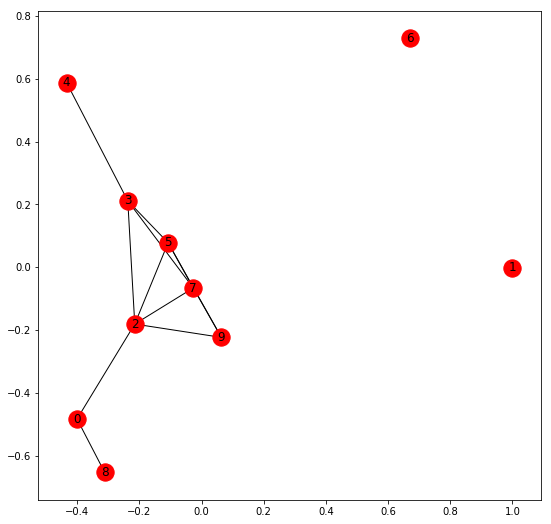

In [11]:
# Displaying the graph
% matplotlib inline

plt.figure(figsize=(9,9))
nx.draw_networkx(sentence_similarity_graph,arrows=True, with_labels=True)


In [12]:
scores

{0: 0.12270301098589445,
 1: 0.01807228915662651,
 2: 0.1693049923617092,
 3: 0.1615290911463358,
 4: 0.03676778560185323,
 5: 0.1608238497264989,
 6: 0.01807228915662651,
 7: 0.13025422436537903,
 8: 0.0865906207127087,
 9: 0.09588184678636777}

# from what we can see looks like the highest ranked page(sentence) is 2 with 0.1693049923617092

In [13]:
ranked_sentence = sorted(((scores[count],sentence) for count,sentence in enumerate(sentences)), reverse=True)    
print("Scores and their sentences from Highest to Lowest : ", ranked_sentence)    

Scores and their sentences from Highest to Lowest :  [(0.1693049923617092, 'In the time of pain and trouble where you wish to cry and wallow in the pits, the entity you have become will not let you to.'), (0.1615290911463358, 'You will be forced to stand tall when all you wish is to fall, forced to look ahead when all you want is to look down.'), (0.1608238497264989, 'You will be forced to flow when you wish to become stagnant, forced to be firm when your core foundations are shattering, and  forced to burn even more when the light in you has grown dim.'), (0.13025422436537903, 'Days will come when you wish to rid your soul of this entity and be a simple being.'), (0.12270301098589445, 'Child, know it now and let it be clear.'), (0.09588184678636777, 'The entity you have become will not give you such  frivolous chance, because to get rid is to give up and to give up is not the character of the highly esteemed being you said you are.'), (0.0865906207127087, 'This my child, will never ha

In [14]:
# Extract top 3 sentences as the summary
for i in range(3):
  print(ranked_sentence[i][1])

In the time of pain and trouble where you wish to cry and wallow in the pits, the entity you have become will not let you to.
You will be forced to stand tall when all you wish is to fall, forced to look ahead when all you want is to look down.
You will be forced to flow when you wish to become stagnant, forced to be firm when your core foundations are shattering, and  forced to burn even more when the light in you has grown dim.


### References

# https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

# https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

### ----------------------------------------------------------------------------------------------------------------